In [32]:
import pandas as pd # ta ky ap data ko read kr sako
import matplotlib.pyplot as plt
#url='https://raw.githubusercontent.com/A5inity/Machine-Learning-Basics/main/Advertising.csv'
#data=pd.read_csv(url)
from google.colab import drive
!gdown 17ugIwuhqWBCIJd98IYfJTE60qi3wPekl
data=pd.read_csv('Advertising.csv')
data.head()

Downloading...
From: https://drive.google.com/uc?id=17ugIwuhqWBCIJd98IYfJTE60qi3wPekl
To: /content/Advertising.csv
100% 5.17k/5.17k [00:00<00:00, 12.5MB/s]


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
data = data.drop(['Unnamed: 0'],axis=1)
data.columns = ['TV','Radio','Newspaper','Sales']

In [19]:
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [20]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

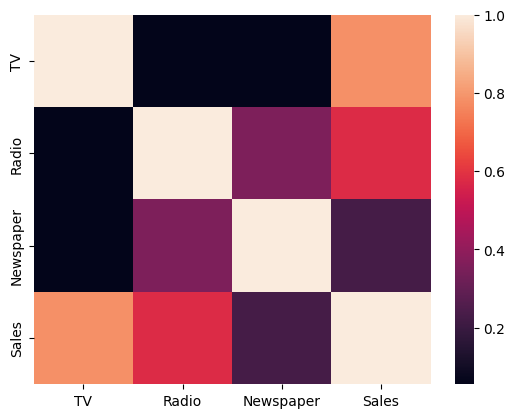

In [21]:
import seaborn as sns
sns.heatmap(data.corr())

In [22]:
data.shape

(200, 4)

# Implementing a Gradient descent method to fit the data.

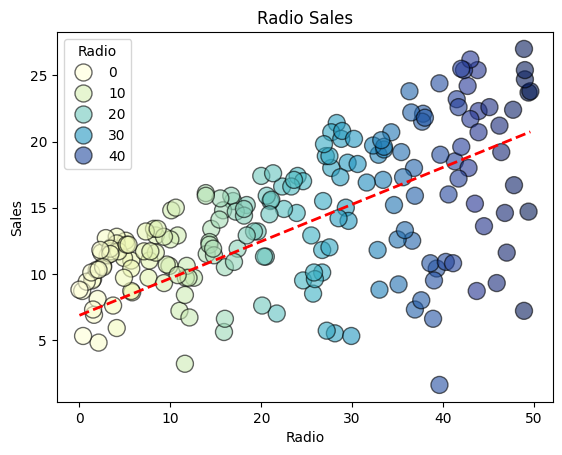

In [31]:
import matplotlib.pyplot as plt
import numpy as np
# The gradient descent method was implemented using Neural Nine's video on Linear regression : https://www.youtube.com/watch?v=VmbA0pi2cRQ
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i].Radio
        y = points.iloc[i].Sales
        prediction = m_now * x + b_now
        error = y - prediction
        m_gradient += -(2/n) * x * error
        b_gradient += -(2/n) * error

    m = m_now - L * m_gradient
    b = b_now - L * b_gradient

#Ensures there is no Null value error if the Learning rate is too small, although, the code will display a null error if the Learning rate is increased
    if np.isnan(m) or np.isnan(b) or np.isinf(m) or np.isinf(b):
        raise ValueError("Gradient descent produced NaN or Inf values")

    return m, b

# Initialize parameters
m = 5
b = 7
L = 0.00001
epochs = 500

# Gradient Descent
for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
import seaborn as sns

# Plot the data with Seaborn scatterplot, using hue to color by another variable
sns.scatterplot(
    data=data, x='Radio', y='Sales', s=150, edgecolor="black",hue='Radio', palette="YlGnBu", alpha=0.6)

# Calculate the regression line using np.linspace to cover the range of the data
x_values = np.linspace(min(data.Radio), max(data.Radio), 100)
plt.plot(x_values, m * x_values + b, color="Red", linestyle='dashed', linewidth=2)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio Sales')
plt.grid(False)
plt.show()

## The model indicates there is a rising trend in Sales for Radio, although the Low R2 value indicates a weak fit, lets see what the residual plot tells us.

---



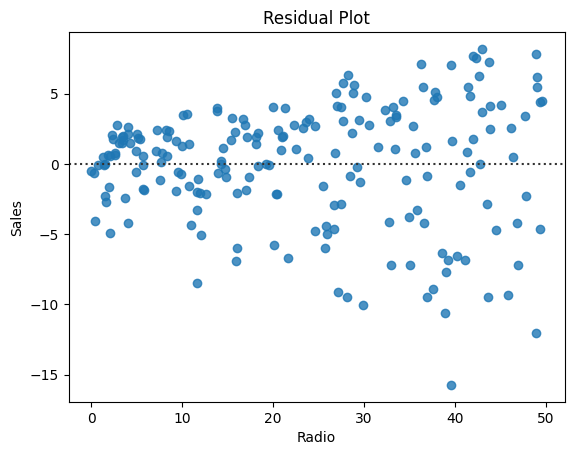

In [24]:
#Checking residual plot
import seaborn as sns
sns.residplot(x="Radio",y="Sales",data=data)
plt.title("Residual Plot")
plt.show()

# Our model has heteroscedasticity, there is an error in our initial assumptions, trying a Weighted Least square to correct the model.

---



In [25]:
#Checking if using a Weight Least squares approach would work.
import statsmodels.formula.api as sm
ols_model =sm.ols('Sales~Radio',data=data).fit()
residuals=ols_model.resid
weights=1/(residuals**2)
wls_model=sm.wls('Sales~Radio',data=data,weights=weights).fit()
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.319e+05
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.46e-281
Time:                        12:17:17   Log-Likelihood:                -426.19
No. Observations:                 200   AIC:                             856.4
Df Residuals:                     198   BIC:                             863.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2909      0.011    863.459      0.0

The R**2 is too large, it maybe an overfitting.

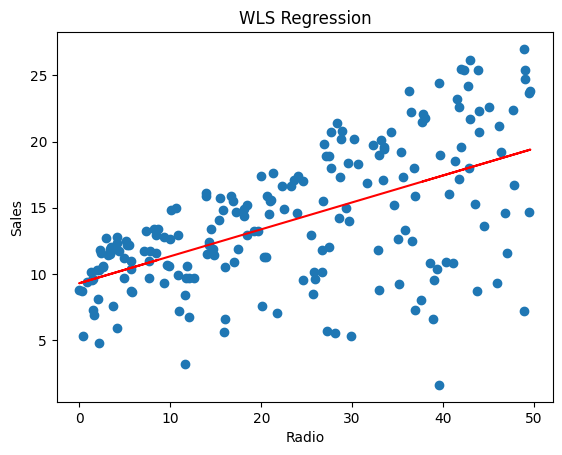

In [26]:
# Scatter plot of data points
plt.scatter(data['Radio'], data['Sales'])

# Calculate fitted values from WLS model
fitted_values = wls_model.predict()

# Plot fitted regression line
plt.plot(data['Radio'], fitted_values, color='red')

# Add labels and title
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('WLS Regression')
plt.grid(False)
# Show plot
plt.show()

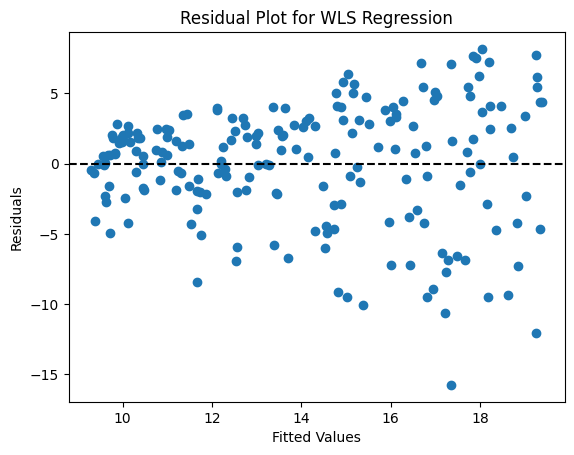

In [27]:
# Calculate residuals from WLS model
residuals = wls_model.resid

# Plot residuals against fitted values
plt.scatter(fitted_values, residuals)

# Add horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for WLS Regression')

# Show plot
plt.show()

#The data is still skewed, unable to eliminate the heteroscedasticity.

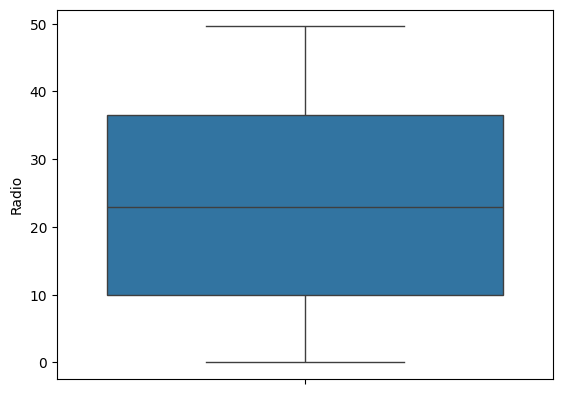

In [28]:
sns.boxplot(y=data['Radio'])
plt.show()